# This uses the methodology of Template Matching
### To find objects in an image using Template Matching
### You will see these functions : `cv.matchTemplate()`, `cv.minMaxLoc()`

### Theory
#### Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function `cv.matchTemplate()` for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use cv.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.

In [37]:
# imports
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#### Original image

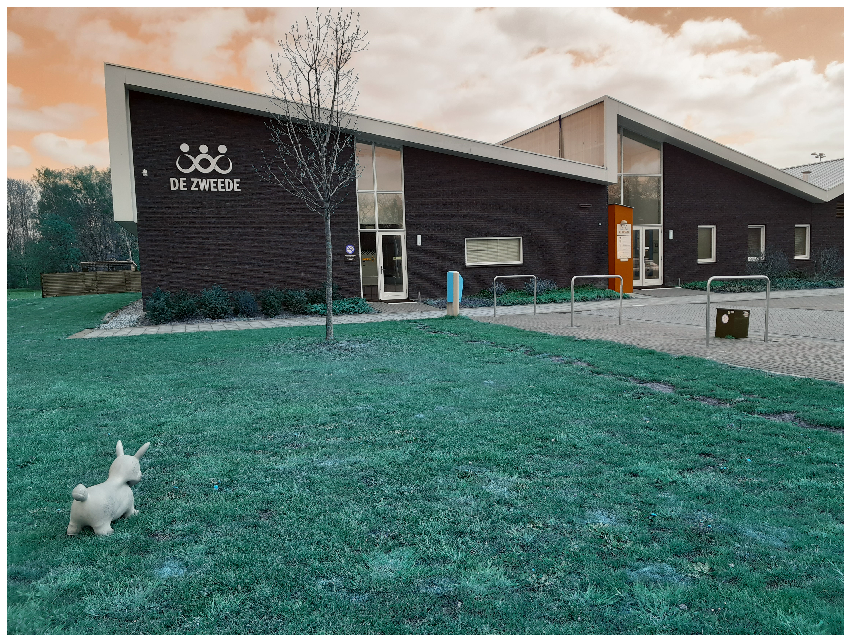

In [38]:
img_rgb = cv.imread('RV_CV_Assignment_3_A_im1.jpg')
plot(img_rgb)

# The second image the mask should be added

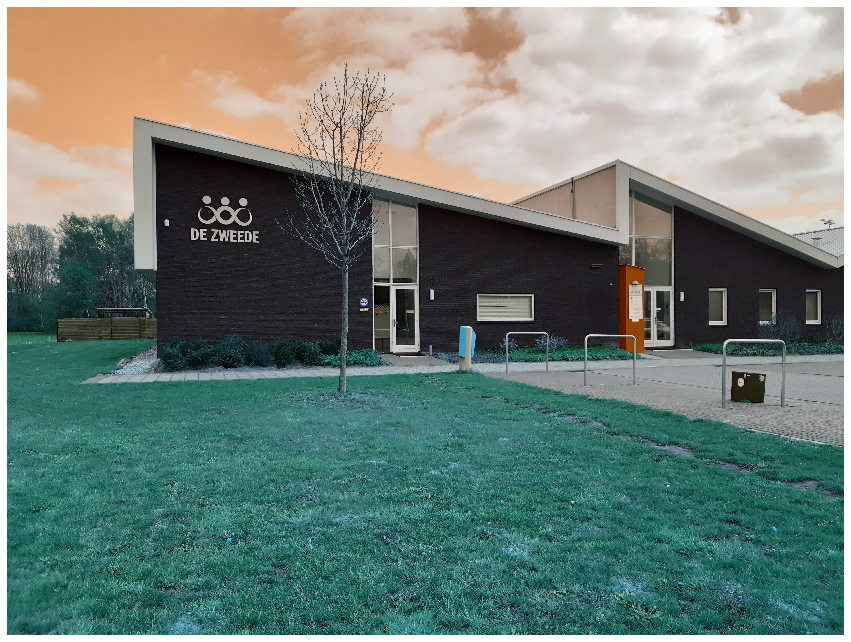

In [39]:
img_rgb2 = cv2.imread("RV_CV_Assignment_3_B_im1.jpg")
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
plot(img_rgb2)

## Bunny Template

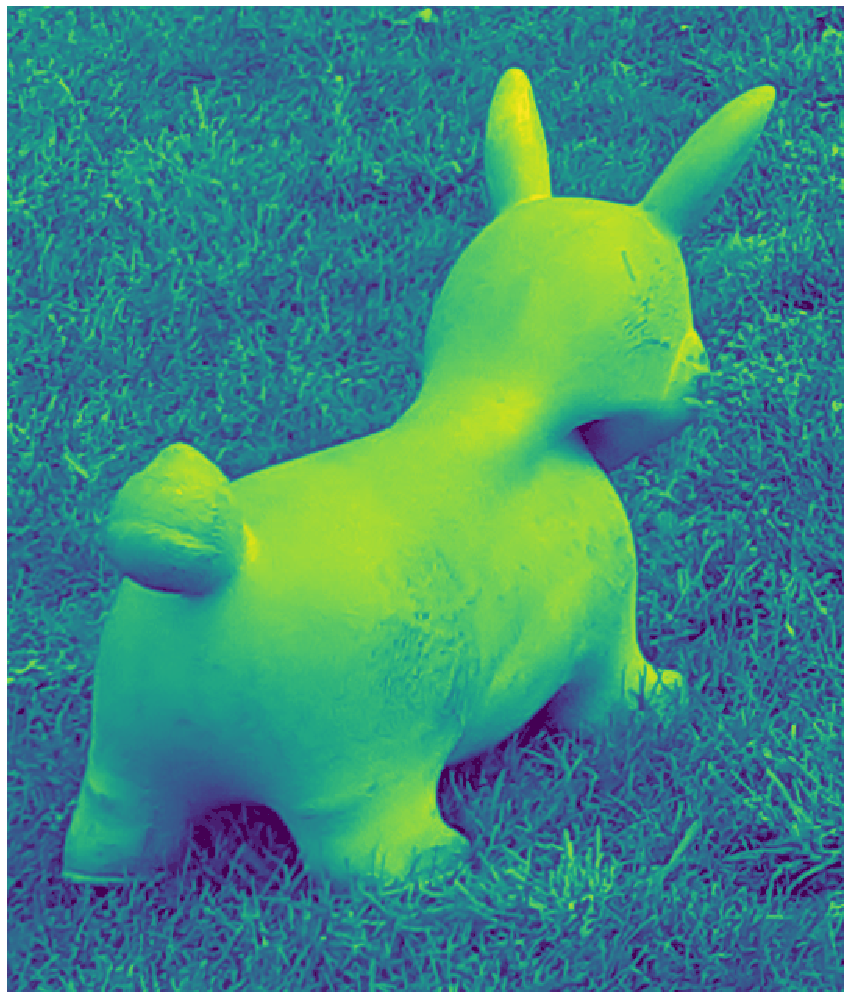

In [40]:
template = cv.imread('bunny.png',0)
plot(template)

In [41]:

w, h = template.shape[::-1]

# Match template method
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
#     cv.rectangle(img_rgb2, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    cv.circle(img_rgb2, (int(pt[0]+w/2), int(pt[1]+h/2)), int(h/2), (0,0, 255), 2)


## Plot and save the result

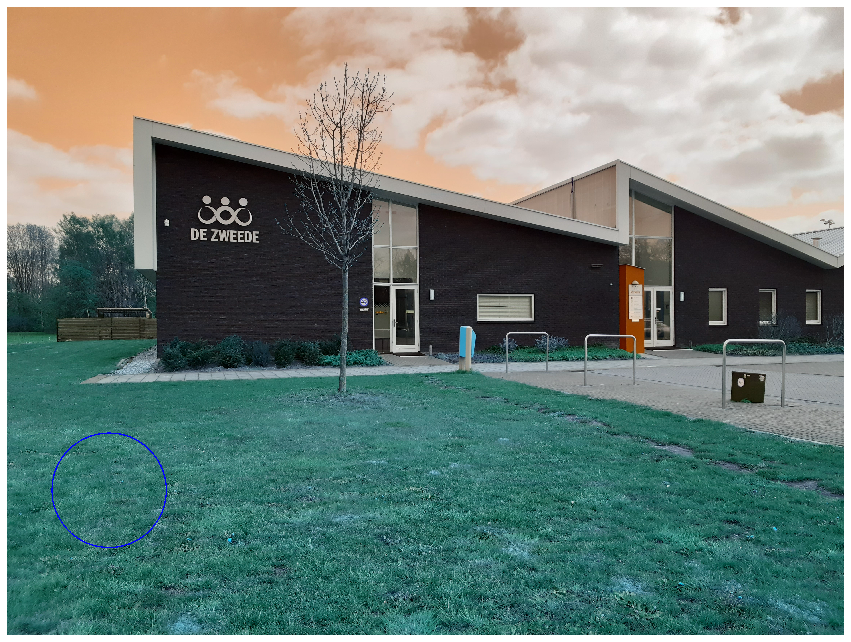

In [42]:
cv.imwrite('res.png',img_rgb2)
plot(img_rgb2)